<BarContainer object of 34 artists>

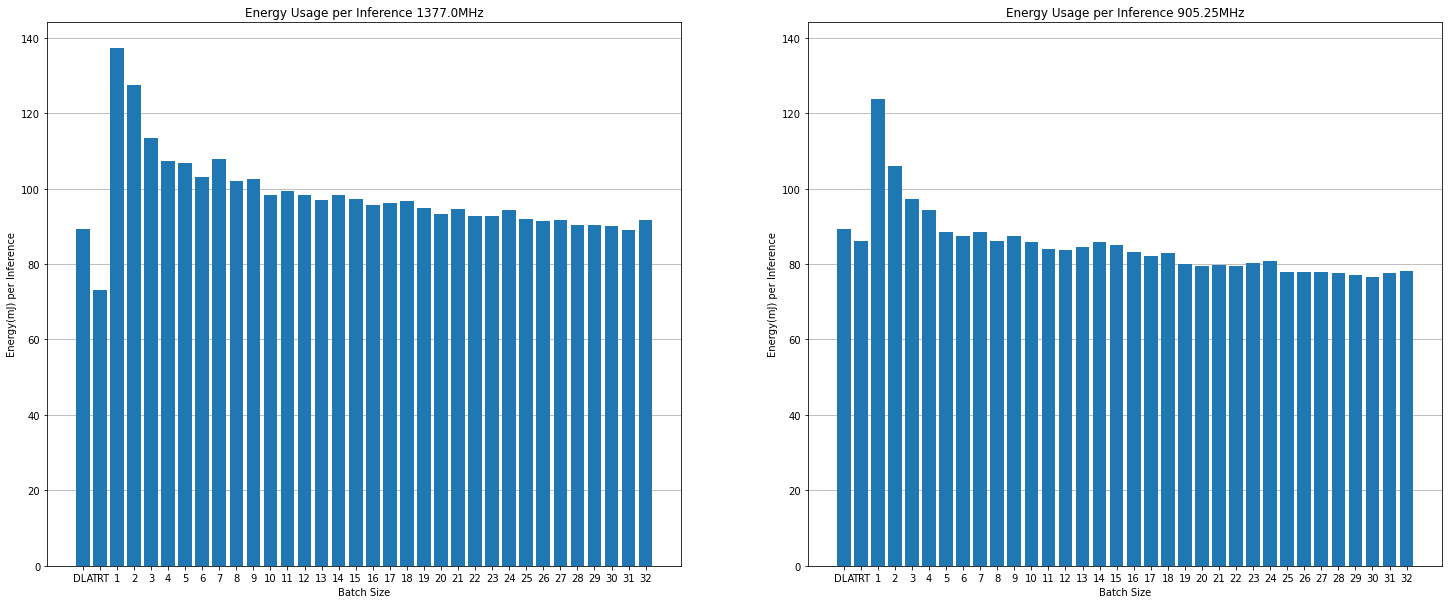

In [1]:
import matplotlib.pyplot as plt

max_frequency = "1377000000"
eff_frequency = "905250000"

# Batch Size,Concurrency,Inferences/Second,Client Send,Network+Server Send/Recv,Server Queue,Server Compute Input,Server Compute Infer,Server Compute Output,Client Recv,p50 latency,p90 latency,p95 latency,p99 latency


# GPU Max
max_gpu_data = []
max_gpu_power_data = []
max_gpu_timings = []

with open(f"data/agx/{max_frequency}_data.csv", "r") as f:
  max_gpu_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/{max_frequency}_power.csv", "r") as f:
  max_gpu_power_data = [l.strip().split(",") for l in f.readlines()]

with open(f"data/agx/{max_frequency}_timings.csv", "r") as f:
  max_gpu_timings = [l.strip().split(",") for l in f.readlines()[1:]]


# GPU Eff
eff_gpu_data = []
eff_gpu_power_data = []
eff_gpu_timings = []

with open(f"data/agx/{eff_frequency}_data.csv", "r") as f:
  eff_gpu_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/{eff_frequency}_power.csv", "r") as f:
  eff_gpu_power_data = [l.strip().split(",") for l in f.readlines()]

with open(f"data/agx/{eff_frequency}_timings.csv", "r") as f:
  eff_gpu_timings = [l.strip().split(",") for l in f.readlines()[1:]]


# DLA Real
dla_max_data = []
dla_max_power_data = []
dla_max_timings = []

with open(f"data/agx/dla_data.csv", "r") as f:
  dla_max_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/dla_power.csv", "r") as f:
  dla_max_power_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/dla_timings.csv", "r") as f:
  dla_max_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_power = [p for p in dla_max_power_data if p[0] > dla_max_timings[0][0] and p[0] < dla_max_timings[0][1]]
avg_dla_power = sum([float(r[1]) for r in dla_power])/len(dla_power)
joule_per_inference_dla = avg_dla_power / float(dla_max_data[0][2])


# DLA Max
dla_max_data = []
dla_max_power_data = []
dla_max_timings = []

with open(f"data/agx/{eff_frequency}_dla_data.csv", "r") as f:
  dla_max_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/{eff_frequency}_dla_power.csv", "r") as f:
  dla_max_power_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/{eff_frequency}_dla_timings.csv", "r") as f:
  dla_max_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_power = [p for p in dla_max_power_data if p[0] > dla_max_timings[0][0] and p[0] < dla_max_timings[0][1]]
avg_dla_power = sum([float(r[1]) for r in dla_power])/len(dla_power)
joule_per_inference = avg_dla_power / float(dla_max_data[0][2])


max_x = ['DLA', 'TRT']
max_y = [joule_per_inference_dla*1000, joule_per_inference*1000]


# DLA Eff
dla_eff_data = []
dla_eff_power_data = []
dla_eff_timings = []

with open(f"data/agx/{max_frequency}_dla_data.csv", "r") as f:
  dla_eff_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/{max_frequency}_dla_power.csv", "r") as f:
  dla_eff_power_data = [l.strip().split(",") for l in f.readlines()[1:]]

with open(f"data/agx/{max_frequency}_dla_timings.csv", "r") as f:
  dla_eff_timings = [l.strip().split(",") for l in f.readlines()[1:]]


dla_power = [p for p in dla_eff_power_data if p[0] > dla_eff_timings[0][0] and p[0] < dla_eff_timings[0][1]]
avg_dla_power = sum([float(r[1]) for r in dla_power])/len(dla_power)
joule_per_inference = avg_dla_power / float(dla_eff_data[0][2])


eff_x = ['DLA', 'TRT']
eff_y = [joule_per_inference_dla*1000, joule_per_inference*1000]


for start, stop, batch_size in max_gpu_timings:
  power = [p for p in max_gpu_power_data if p[0] > start and p[0] < stop]
  d = [d for d in max_gpu_data if d[0] == batch_size][0]
  avg_power = sum([float(r[1]) for r in power])/len(power)
  joule_per_inference = avg_power / float(d[2])

  max_x.append(batch_size)
  max_y.append(joule_per_inference*1000)

for start, stop, batch_size in eff_gpu_timings:
  power = [p for p in eff_gpu_power_data if p[0] > start and p[0] < stop]
  d = [d for d in eff_gpu_data if d[0] == batch_size][0]
  avg_power = sum([float(r[1]) for r in power])/len(power)
  joule_per_inference = avg_power / float(d[2])

  eff_x.append(batch_size)
  eff_y.append(joule_per_inference*1000)




fig, ax = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
ax[0].set_title(f"Energy Usage per Inference {int(max_frequency)/1000000}MHz")
ax[0].set_xlabel("Batch Size")
ax[0].set_ylabel("Energy(mJ) per Inference")
ax[0].bar(max_x, max_y)

ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].yaxis.set_tick_params(labelleft=True)
ax[1].set_title(f"Energy Usage per Inference {int(eff_frequency)/1000000}MHz")
ax[1].set_xlabel("Batch Size")
ax[1].set_ylabel("Energy(mJ) per Inference")
ax[1].bar(eff_x, eff_y)


<BarContainer object of 14 artists>

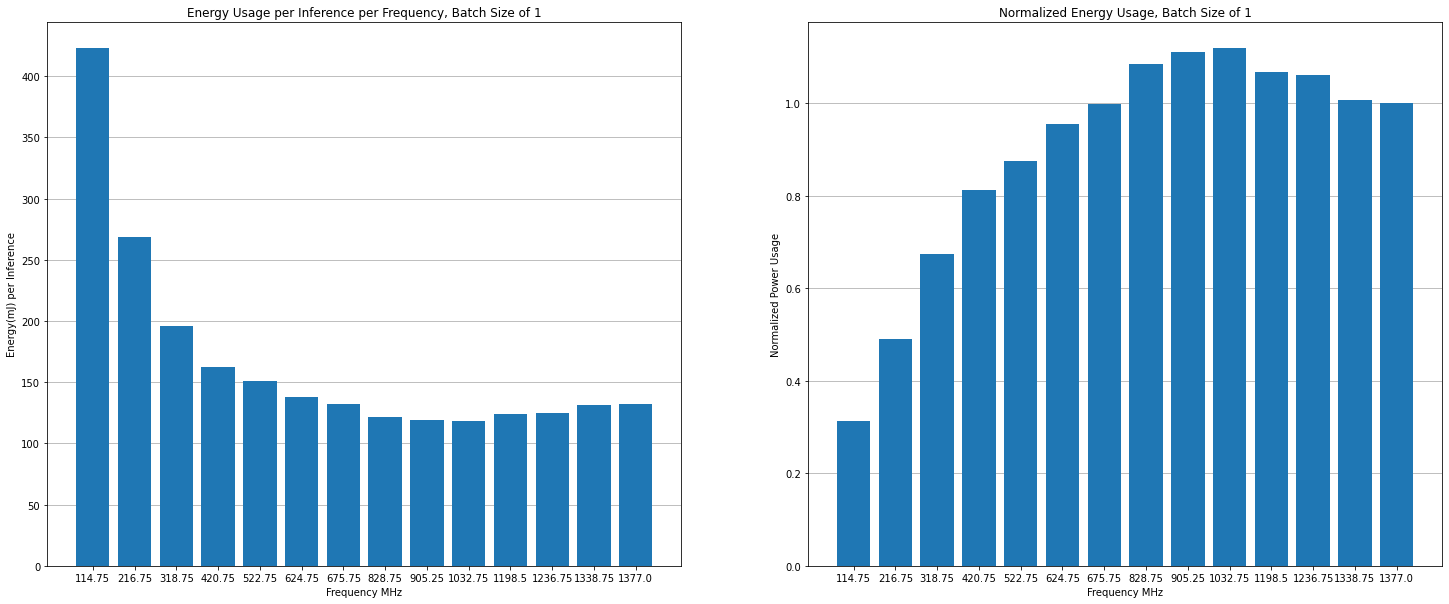

In [2]:
batch_size = 1

data = []
power = []
timings = []
with open(f"data/agx/batch_{batch_size}_data.csv", "r") as f_data, open(f"data/agx/batch_{batch_size}_power.csv", "r") as f_power, open(f"data/agx/batch_{batch_size}_timings.csv", "r") as f_timings:
  data = [l.strip().split(",") for l in f_data.readlines()[1:]]
  power = [l.strip().split(",") for l in f_power.readlines()[1:]]
  timings = [l.strip().split(",") for l in f_timings.readlines()[1:]]

x = []
y = []

for start, stop, frequency in timings:
  power_raw = [p for p in power if p[0] > start and p[0] < stop]
  d = [d for d in data if d[0] == frequency][0]
  avg_power = sum([float(r[1]) for r in power_raw])/len(power_raw)
  joule_per_inference = avg_power / float(d[2])

  x.append(str(int(frequency)/1000000))
  y.append(joule_per_inference*1000)

normalized_y = [y[-1]/_y for _y in y]

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
ax[0].set_title(f"Energy Usage per Inference per Frequency, Batch Size of {batch_size}")
ax[0].set_xlabel("Frequency MHz")
ax[0].set_ylabel("Energy(mJ) per Inference")
ax[0].bar(x, y)

ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].set_title(f"Normalized Energy Usage, Batch Size of {batch_size}")
ax[1].set_xlabel("Frequency MHz")
ax[1].set_ylabel("Normalized Power Usage")
ax[1].bar(x, normalized_y)

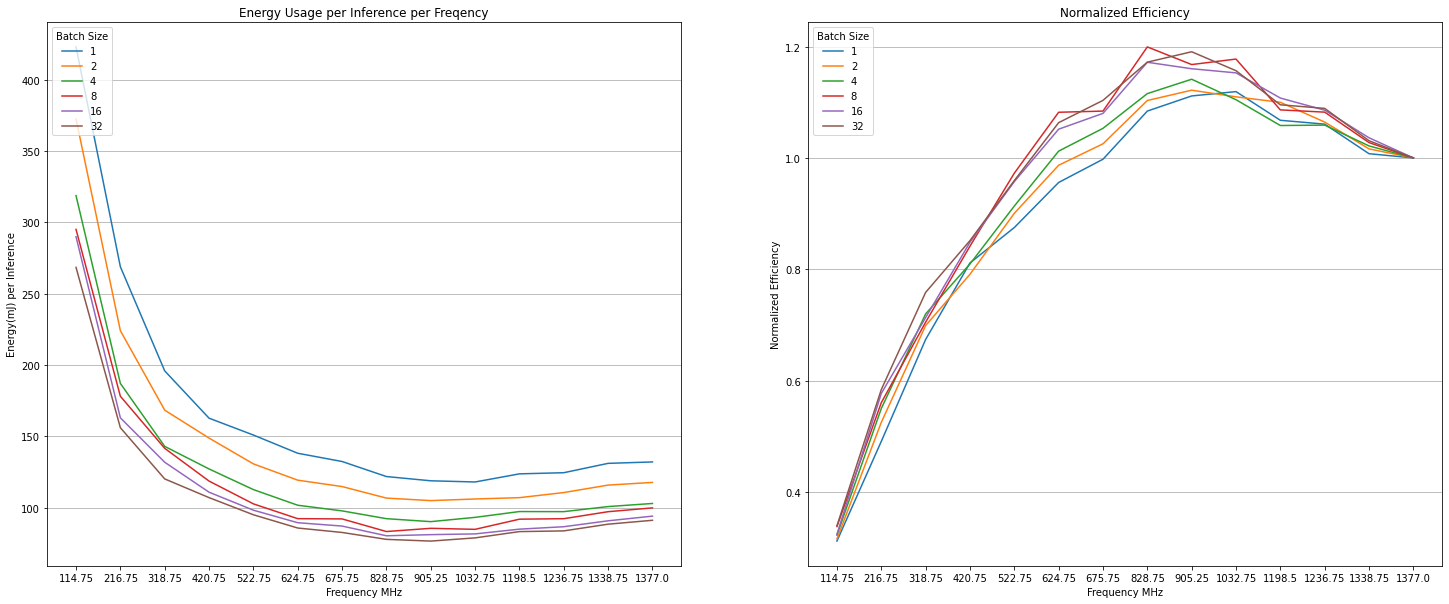

In [3]:
batch_sizes = [1, 2, 4, 8, 16, 32]

data = []
power = []
timings = []
for size in batch_sizes:
  with open(f"data/agx/batch_{size}_data.csv", "r") as f_data, open(f"data/agx/batch_{size}_power.csv", "r") as f_power, open(f"data/agx/batch_{size}_timings.csv", "r") as f_timings:
    data.append([l.strip().split(",") for l in f_data.readlines()[1:]])
    power.append([l.strip().split(",") for l in f_power.readlines()[1:]])
    timings.append([l.strip().split(",") for l in f_timings.readlines()[1:]])

x = []
y = []

for idx, timing_data in enumerate(timings):
  x.append([])
  y.append([])
  for start, stop, frequency in timing_data:
    power_raw = [p for p in power[idx] if p[0] > start and p[0] < stop]
    d = [d for d in data[idx] if d[0] == frequency][0]
    avg_power = sum([float(r[1]) for r in power_raw])/len(power_raw)
    joule_per_inference = avg_power / float(d[2])

    x[idx].append(str(int(frequency)/1000000))
    y[idx].append(joule_per_inference*1000)

normalized_y = []
for idx, _ in enumerate(batch_sizes):
  normalized_y.append([y[idx][-1]/_y for _y in y[idx]])

fig, ax = plt.subplots(1, 2, figsize=(25, 10))

ax[0].set_axisbelow(True)
ax[0].grid(axis='y')
ax[0].set_title(f"Energy Usage per Inference per Freqency")
ax[0].set_xlabel("Frequency MHz")
ax[0].set_ylabel("Energy(mJ) per Inference")
for idx, size in enumerate(batch_sizes):
  ax[0].plot(x[idx], y[idx], label=f"{size}")
ax[0].legend(loc="upper left", title="Batch Size")

ax[1].set_axisbelow(True)
ax[1].grid(axis='y')
ax[1].set_title(f"Normalized Efficiency")
ax[1].set_xlabel("Frequency MHz")
ax[1].set_ylabel("Normalized Efficiency")
for idx, size in enumerate(batch_sizes):
  ax[1].plot(x[idx], normalized_y[idx], label=f"{size}")
ax[1].legend(loc="upper left", title="Batch Size")